### Three Mirror Fabri-Perot Cavities
Three-mirror Fabry–Perot cavities (3MCs) exhibit richer and more tunable resonance structures than standard two-mirror cavities, due to the interference between their two sub-cavities.

<p align="center">
  <img src="threemirrorcavity.png" width="500"/>
</p>

The corresponding wavefunctions are given by:

<p align="center">
  <img src="threemirrorwavefunctions.png" width="500"/>
</p>


https://ccahilla.github.io/fabryperot.html

### Elements of the Three-Mirror System


#### 1. Mirror Reflectivities and Transmissivities

Each mirror \( M_i \) has:

$$
R_i = \text{Power reflectivity}, \quad T_i = 1 - R_i = \text{Power transmissivity}
$$

Amplitude coefficients:

$$
r_i = \sqrt{R_i}, \quad t_i = \sqrt{1 - R_i}
$$

Typically:

$$
R_1 = R_3 > R_2 \quad \text{(middle mirror couples the subcavities)}
$$

---

#### 2. Subcavity Lengths

The three-mirror cavity is composed of two coupled subcavities:

$$
L_1 = \text{distance between } M_1 \text{ and } M_2 \\
L_2 = \text{distance between } M_2 \text{ and } M_3
$$

Each subcavity can resonate independently, and the coupling through M_2 gives rise to mode splitting.

---

#### 3. Phase Accumulation

The total optical phase accumulated over propagation is based on:

$$
k = \frac{2\pi \nu}{c}
$$

Relevant phase factors:

$$
e^{2ikL_1}, \quad e^{2ikL_2}, \quad e^{2ik(L_1 + L_2)}
$$

These enter into the transmission amplitude through interference between the two subcavities.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

Parameters:
$$
\lambda = 1064\,\text{nm}
$$

$$
L_1 = 1\,\text{m}, \quad L_2 = 3\,\text{m}
$$

$$
\Delta\nu \in [-155, 155]\,\text{MHz}
$$

$$
k = k_0 + \Delta k = \frac{2\pi}{c}(\nu_0 + \Delta\nu), \quad \text{where} \quad \nu_0 = \frac{c}{\lambda}
$$


In [33]:
#Constants + Parameters
c = 3e8                      
lambda0 = 1063.999e-9           
nu0 = c / lambda0            
k0 = 2 * np.pi / lambda0     
#Frequency detuning (Δν from -150 MHz to 150 MHz)
dnu = np.linspace(-200e6, 200e6, 1000)
nu = nu0+dnu
k = 2*np.pi*nu/c 

In [4]:
#Frequency detuning (Δν from -150 MHz to 150 MHz)
dnu = np.linspace(-200e6, 200e6, 1000)
nu = nu0+dnu
k = 2*np.pi*nu/c      

#Mirror reflectivities and transmissivities (same for all mirrors)
R = 0.9
T = 1-R
r = np.sqrt(R)
t = np.sqrt(T)

#Sub-cavity lengths
L1 = 1.0
L2 = 3.0


The transmitted field amplitude $t$ for a three-mirror Fabry-Perot cavity is given by:

$$
t = \frac{-t_1 t_2 t_3 \, e^{i k (L_1 + L_2)}}{e^{2i k (L_1 + L_2)} - r_1 r_2 \, e^{2i k L_2} - r_2 r_3 \, e^{2i k L_1} + r_1 r_3 (r_2^2 + t_2^2)}
$$

Where:
- $r_i$ is the amplitude reflectivity of mirror $i$  
- $t_i$ is the amplitude transmissivity of mirror $i$  
- $L_1$ and $L_2$ are the sub-cavity lengths  
- $k = \frac{2\pi}{\lambda}$ is the wave number



In [5]:
def T_three_mirror(k,L1,L2,r1,r2,r3,t1,t2,t3):
    # Phase terms
    e_total = np.exp(2j*k*(L1+L2))
    e_L2 = np.exp(2j*k*L2)
    e_L1 = np.exp(2j*k*L1)

    num = -t1*t2*t3*np.exp(1j*k*(L1+L2))
    denom = (e_total - r1*r2*e_L2 - r2*r2*e_L1 + r1*r3*(r2**2+t2**2))

    return np.abs(num / denom)**2


The standard Fabri-Perot Transmission Formula is given by:
$$
T_{\text{FP}} = \frac{T_1 T_2}{1 + R_1 R_2 - 2\sqrt{R_1 R_2} \cos(2kL)}
$$


In [6]:
#Standard Fabri-Perot Cavity
def T_fp(k, L,R1, R2, T1,T2):
    delta = 2*k*L
    return (T1*T2)/(1+ R1*R2 - 2*np.sqrt(R1*R2)*np.cos(delta))

def compute_fwhm(x, y):
    half_max = np.max(y) / 2.0
    indices = np.where(y >= half_max)[0]
    if len(indices) < 2:
        return 0.0
    fwhm = x[indices[-1]] - x[indices[0]]
    return fwhm

### L1 = 1 m , L2 = 3 m

In [7]:
#Compute spectra
T3 = T_three_mirror(k, L1,L2,r,r,r,t,t,t)
TFP1 = T_fp(k, L1,R,R,T,T)
TFP3 = T_fp(k, L2,R,R,T,T)

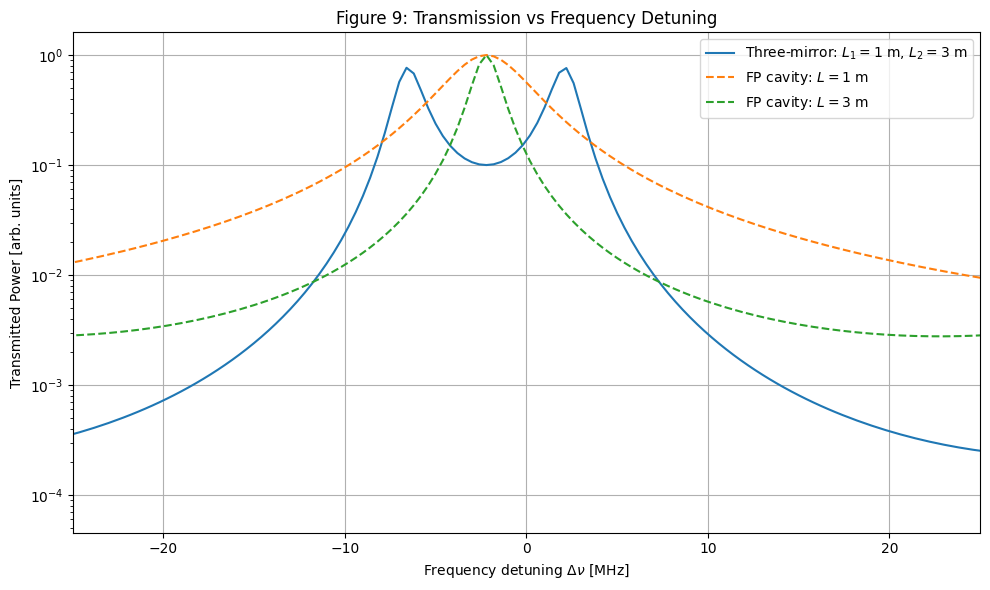

In [8]:
#Plots
plt.figure(figsize=(10, 6))
plt.semilogy(dnu*1e-6, T3, label='Three-mirror: $L_1=1$ m, $L_2=3$ m')
plt.semilogy(dnu*1e-6, TFP1, '--', label='FP cavity: $L=1$ m')
plt.semilogy(dnu*1e-6, TFP3, '--', label='FP cavity: $L=3$ m')

plt.xlabel("Frequency detuning $\\Delta\\nu$ [MHz]")
plt.ylabel("Transmitted Power [arb. units]")
plt.title("Figure 9: Transmission vs Frequency Detuning")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.xlim(-25,25)
plt.show()

### L1 = 2 m , L2 = 2 m

In [9]:
#Compute spectra
T3_2 = T_three_mirror(k, 2,2,r,r,r,t,t,t)
TFP_2 = T_fp(k,2,R,R,T,T)

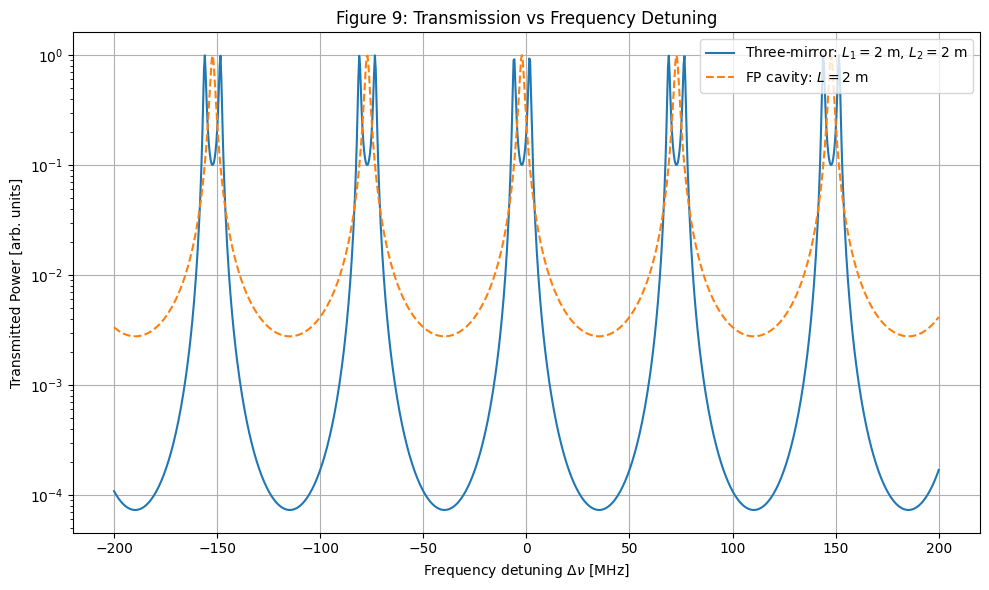

In [10]:
#Plots
plt.figure(figsize=(10, 6))
plt.semilogy(dnu*1e-6, T3_2, label='Three-mirror: $L_1=2$ m, $L_2=2$ m')
plt.semilogy(dnu*1e-6, TFP_2, '--', label='FP cavity: $L=2$ m')
#plt.semilogy(dnu*1e-6, TFP2, '--', label='FP cavity: $L=3$ m')

plt.xlabel("Frequency detuning $\\Delta\\nu$ [MHz]")
plt.ylabel("Transmitted Power [arb. units]")
plt.title("Figure 9: Transmission vs Frequency Detuning")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### L1 = 1 m , L2 = 3 m

In [27]:
#Mirror reflectivities and transmissivities (same for all mirrors)
R1,R2,R3 = 0.9, 0.9, 0.9999
T1, T2, T3 = 1-R1, 1-R2, 1-R3

r1, r2, r3 = np.sqrt(R1), np.sqrt(R2), np.sqrt(R3)
t1, t2, t3 = np.sqrt(T1), np.sqrt(T2), np.sqrt(T3)

#Sub-cavity lengths
L1 = 6.0e-3
L2 = 3.0

In [28]:
#Compute spectra
T_3mirror = T_three_mirror(k, L1, L2, r1,r2,r3,t1,t2,t3)
T_effective2mirror = T_fp(k, L1+L2,R1,R3,T1,T3)

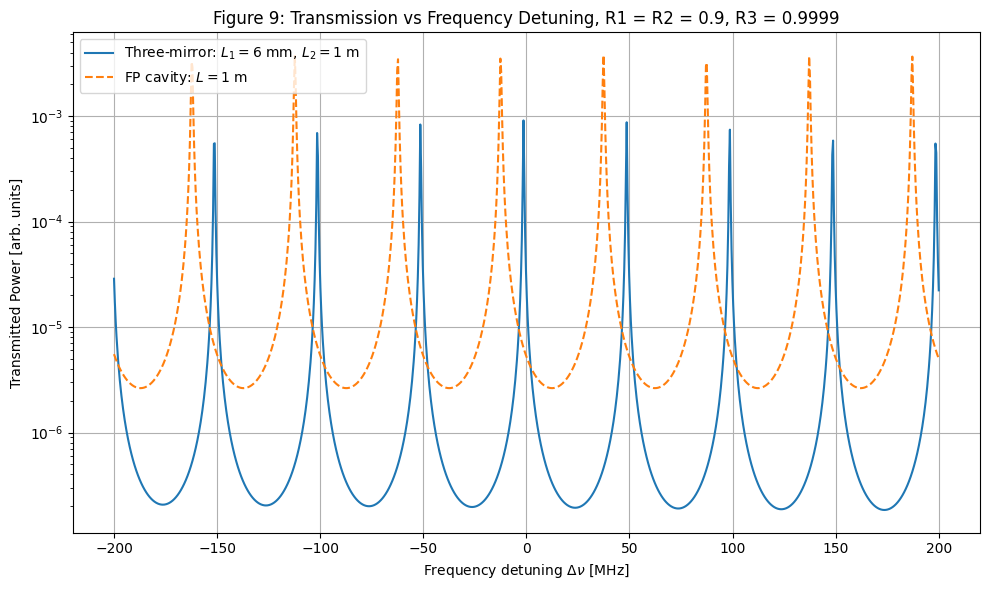

In [29]:
#Plots
dnu = np.linspace(-200e6, 200e6, 1000)
plt.figure(figsize=(10, 6))
plt.semilogy(dnu*1e-6, T_3mirror, label='Three-mirror: $L_1=6$ mm, $L_2=1$ m')
plt.semilogy(dnu*1e-6, T_effective2mirror, '--', label='FP cavity: $L=1$ m')

plt.xlabel("Frequency detuning $\\Delta\\nu$ [MHz]")
plt.ylabel("Transmitted Power [arb. units]")
plt.title("Figure 9: Transmission vs Frequency Detuning, R1 = R2 = 0.9, R3 = 0.9999")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#print("FP cavity L=2 m: max =", np.max(TFP_L_1), ", min =", np.min(TFP_L_1))
#print("FP cavity L=3 m: max =", np.max(TFP_L_3), ", min =", np.min(TFP_L_3))

In [99]:
#Mirror reflectivities and transmissivities (same for all mirrors)
R1,R2,R3 = 0.9, 0.9, 0.9999
T1, T2, T3 = 1-R1, 1-R2, 1-R3

r1, r2, r3 = np.sqrt(R1), np.sqrt(R2), np.sqrt(R3)
t1, t2, t3 = np.sqrt(T1), np.sqrt(T2), np.sqrt(T3)

#Sub-cavity lengths
L1 = 1.0
L2 = 3.0

In [100]:
#Compute spectra
T3_3 = T_three_mirror(k, L1, L2, r1,r2,r3,t1,t2,t3)
TFP_L_1 = T_fp(k, L1,R1,R3,T1,T3)
TFP_L_3 = T_fp(k, L2,R1,R3,T1,T3)

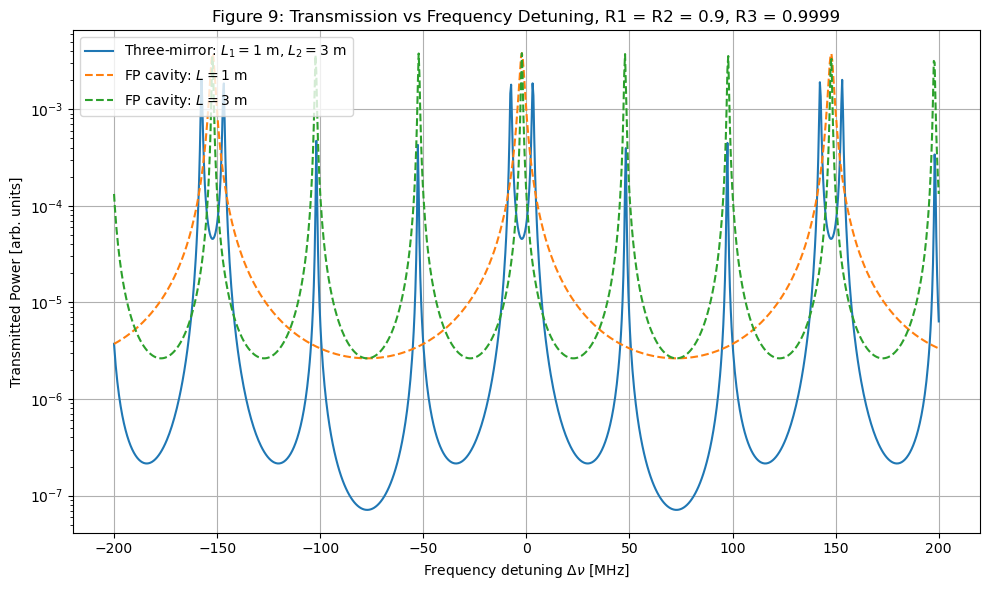

FP cavity L=2 m: max = 0.003790051411843425 , min = 2.6335470697234837e-06
FP cavity L=3 m: max = 0.003787616360440386 , min = 2.6335340706043453e-06


In [101]:
#Plots
dnu = np.linspace(-200e6, 200e6, 1000)
plt.figure(figsize=(10, 6))
plt.semilogy(dnu*1e-6, T3_3, label='Three-mirror: $L_1=1$ m, $L_2=3$ m')
plt.semilogy(dnu*1e-6, TFP_L_1, '--', label='FP cavity: $L=1$ m')
plt.semilogy(dnu*1e-6, TFP_L_3, '--', label='FP cavity: $L=3$ m')

plt.xlabel("Frequency detuning $\\Delta\\nu$ [MHz]")
plt.ylabel("Transmitted Power [arb. units]")
plt.title("Figure 9: Transmission vs Frequency Detuning, R1 = R2 = 0.9, R3 = 0.9999")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("FP cavity L=2 m: max =", np.max(TFP_L_1), ", min =", np.min(TFP_L_1))
print("FP cavity L=3 m: max =", np.max(TFP_L_3), ", min =", np.min(TFP_L_3))

In [59]:
fwhm_fp_2 = compute_fwhm(dnu * 1e-6, TFP_L_1)  # in MHz
fwhm_fp_3 = compute_fwhm(dnu * 1e-6, TFP_L_3)  # in MHz

print("FWHM of FP cavity L=1 m:", fwhm_fp_2, "MHz")
print("FWHM of FP cavity L=3 m:", fwhm_fp_3, "MHz")

FWHM of FP cavity L=1 m: 190.19019019019015 MHz
FWHM of FP cavity L=3 m: 313.11311311311306 MHz


Bandwidth Tuning


In [11]:
def BW_tunability(L1,L2,R1,R2,R3,lamb=1064e-9, tunability=0.55, heating_capacity=10):
    c = 3e8
    prefactor = c/(8*np.pi*L2)
    num = (1-R1)*(1-R2)
    denom = 1-2*np.sqrt(R1*R2)*np.cos(4*np.pi*L1/lamb)
    baseline_bw = prefactor*(num/denom + (1-R3))

    # Temperature Tunability
    dL1_dT = 0.55e-6 * L1 
    dTeff_dphi = (2 * np.sqrt(R1*R2)*(1-R1)*(1-R2))/(1+R1*R2)**2 # at quadrature (phi = pi/2)
    dgamma_dL1 = prefactor * dTeff_dphi * (4*np.pi/lamb)
    bw_expansion = dgamma_dL1 * dL1_dT

    return baseline_bw, bw_expansion, dL1_dT, dgamma_dL1 

def T_3_mirror(k,L1,L2,R1,R2,R3):
    # Phase terms
    r1,r2,r3 = np.sqrt(R1), np.sqrt(R2), np.sqrt(R3)
    t1,t2,t3 = np.sqrt(1-R1), np.sqrt(1-R2), np.sqrt(1-R3)
    
    e_total = np.exp(2j*k*(L1+L2))
    e_L2 = np.exp(2j*k*L2)
    e_L1 = np.exp(2j*k*L1)

    num = -t1*t2*t3*np.exp(1j*k*(L1+L2))
    denom = (e_total - r1*r2*e_L2 - r2*r2*e_L1 + r1*r3*(r2**2+t2**2))

    return np.abs(num / denom)**2

#Standard Fabri-Perot Cavity
def T_fp(k,L,R1,R2):
    T1,T2 = 1-R1, 1-R2
    delta = 2*k*L
    return (T1*T2)/(1+ R1*R2 - 2*np.sqrt(R1*R2)*np.cos(delta))

In [4]:
#Constants + Parameters
c = 3e8                      
lambda0 = 1063.999e-9           
nu0 = c / lambda0            
k0 = 2 * np.pi / lambda0     

#Frequency detuning (Δν from -150 MHz to 150 MHz)
dnu = np.linspace(-200e6, 200e6, 1000)
nu = nu0+dnu
k = 2*np.pi*nu/c 

L1 : 0.005 m, Baseline Bandwidth: 20093.830183746613 Hz, Bandwidth Tunability: 4.882458563455316 Hz/C
L1 : 0.007 m, Baseline Bandwidth: 19467.012390583634 Hz, Bandwidth Tunability: 6.835441988837443 Hz/C
L1 : 0.009000000000000001 m, Baseline Bandwidth: 20188.551694575894 Hz, Bandwidth Tunability: 8.788425414219569 Hz/C
L1 : 0.011 m, Baseline Bandwidth: 20168.28760630982 Hz, Bandwidth Tunability: 10.741408839601695 Hz/C
L1 : 0.013000000000000001 m, Baseline Bandwidth: 19551.399535801454 Hz, Bandwidth Tunability: 12.694392264983822 Hz/C
L1 : 0.015 m, Baseline Bandwidth: 20093.978761642797 Hz, Bandwidth Tunability: 14.647375690365946 Hz/C
L1 : 0.017 m, Baseline Bandwidth: 19405.382273679654 Hz, Bandwidth Tunability: 16.600359115748073 Hz/C
L1 : 0.019 m, Baseline Bandwidth: 20200.82798231384 Hz, Bandwidth Tunability: 18.553342541130203 Hz/C
L1 : 0.021 m, Baseline Bandwidth: 20159.86936869201 Hz, Bandwidth Tunability: 20.50632596651233 Hz/C
L1 : 0.023000000000000003 m, Baseline Bandwidth: 1

C:\Users\Aditi\AppData\Local\Temp\ipykernel_9008\3959763737.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


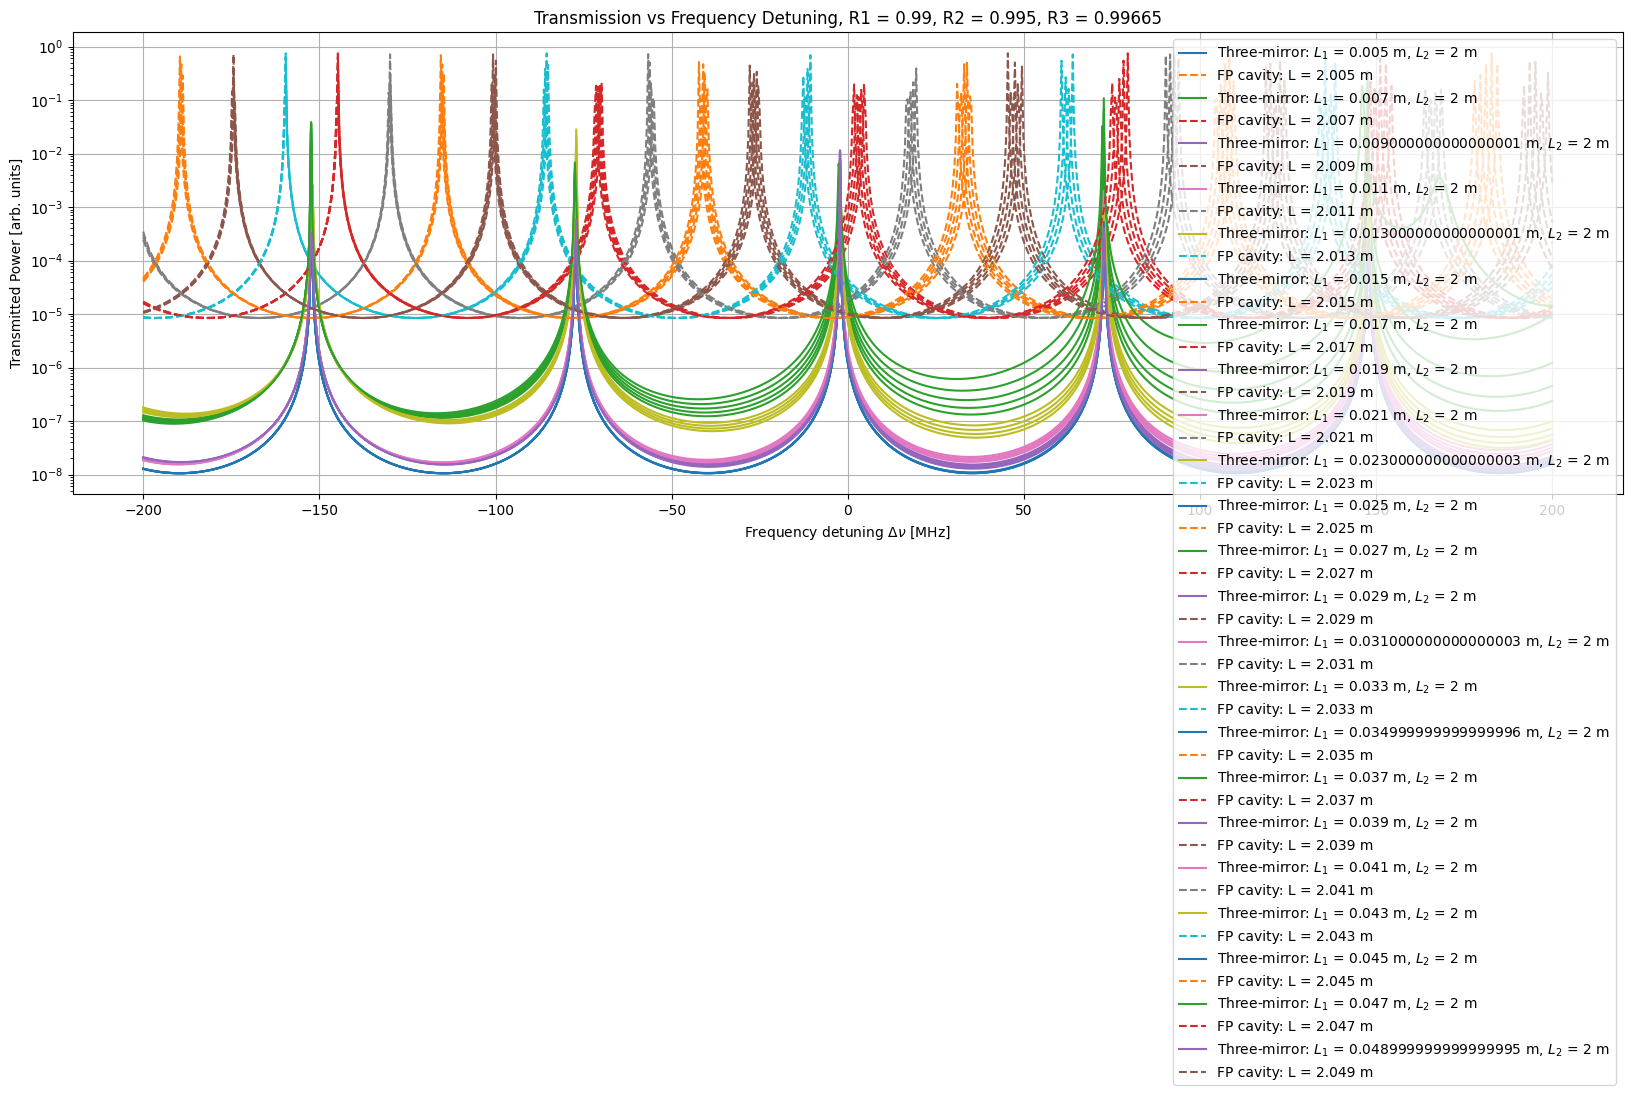

In [10]:
L1_arr = np.arange(5e-3, 51e-3, 2e-3)
L2 = 2
R1 = 0.990
R2 = 0.995
R3 = 0.99665
plt.figure(figsize=(20, 6))
for L1 in L1_arr:

    tunability = BW_tunability(L1,L2,R1,R2,R3)
    print(f"L1 : {L1} m, Baseline Bandwidth: {tunability[0]} Hz, Bandwidth Tunability: {tunability[1]} Hz/C")

    T3_test = T_3_mirror(k,L1,L2,R1,R2,R3)
    T2_test = T_fp(k,L1+L2, R1,R3)
    
    plt.semilogy(dnu*1e-6, T3_test, label=f'Three-mirror: $L_1$ = {L1} m, $L_2$ = {L2} m')
    plt.semilogy(dnu*1e-6, T2_test, '--', label=f'FP cavity: L = {L1+L2} m')
    #plt.semilogy(dnu*1e-6, TFP_L_3, '--', label='FP cavity: $L=3$ m')

plt.xlabel("Frequency detuning $\\Delta\\nu$ [MHz]")
plt.ylabel("Transmitted Power [arb. units]")
plt.title(f"Transmission vs Frequency Detuning, R1 = {R1}, R2 = {R2}, R3 = {R3}")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#print("FP cavity L=2 m: max =", np.max(TFP_L_1), ", min =", np.min(TFP_L_1))
#print("FP cavity L=3 m: max =", np.max(TFP_L_3), ", min =", np.min(TFP_L_3))

L1 : 0.031 m, Baseline Bandwidth: 20152.37590988373 Hz, Bandwidth Tunability: 30.271243093422957 Hz/C


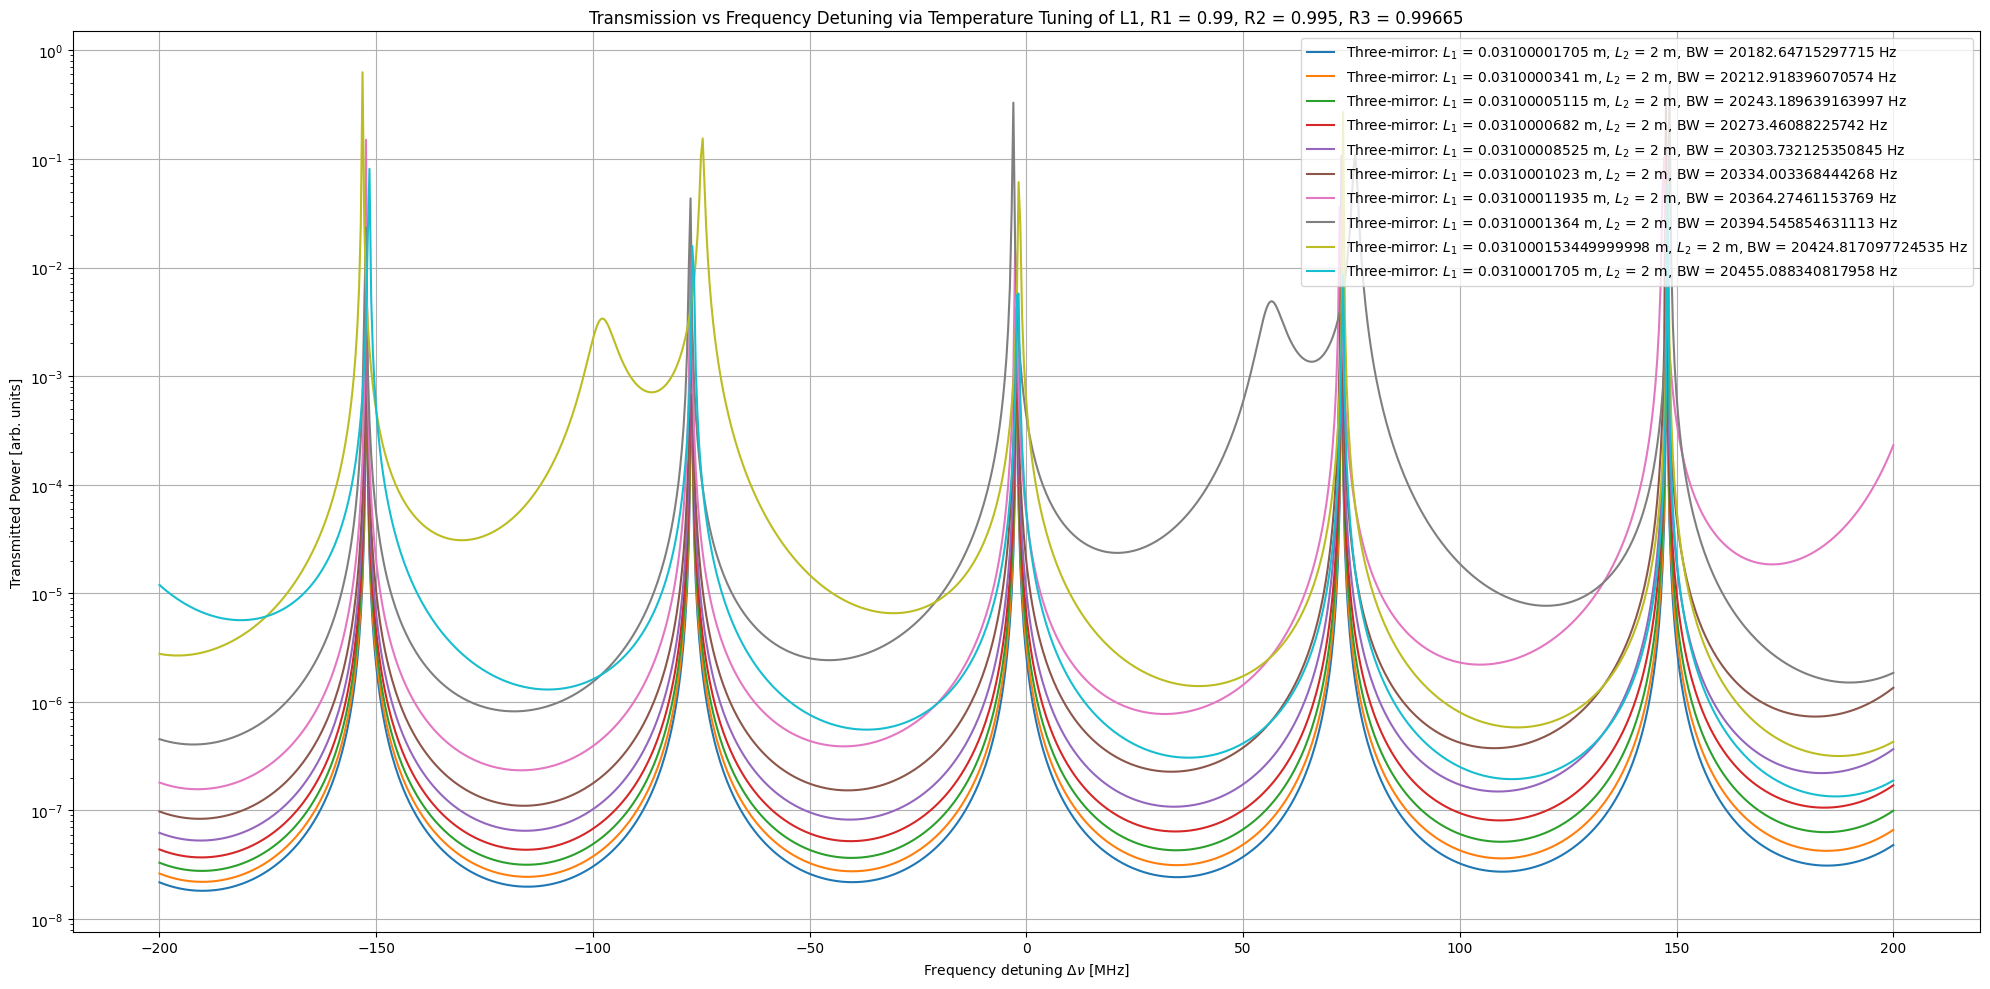

In [16]:
L1_best = 0.031 # 3.1 cm
baseline_bw, bw_expansion, dL1_dT, dgamma_dL1 = BW_tunability(L1_best,L2,R1,R2,R3)
print(f"L1 : {L1_best} m, Baseline Bandwidth: {baseline_bw} Hz, Bandwidth Tunability: {bw_expansion} Hz/C")

plt.figure(figsize=(20, 10))
dL1_arr = [dL1_dT*T for T in np.arange(1,11)]
for dL1 in dL1_arr:
    T3_test = T_3_mirror(k,L1_best+dL1,L2,R1,R2,R3)
    #T2_test = T_fp(k,L1+L2, R1,R3)
    
    plt.semilogy(dnu*1e-6, T3_test, label=f'Three-mirror: $L_1$ = {L1_best+dL1} m, $L_2$ = {L2} m, BW = {baseline_bw+dgamma_dL1*dL1} Hz')
    #plt.semilogy(dnu*1e-6, T2_test, '--', label=f'FP cavity: L = {L1+L2} m')
    #plt.semilogy(dnu*1e-6, TFP_L_3, '--', label='FP cavity: $L=3$ m')

plt.xlabel("Frequency detuning $\\Delta\\nu$ [MHz]")
plt.ylabel("Transmitted Power [arb. units]")
plt.title(f"Transmission vs Frequency Detuning via Temperature Tuning of L1, R1 = {R1}, R2 = {R2}, R3 = {R3}")
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

L1 : 0.031 m, Baseline Bandwidth: 20152.37590988373 Hz, Bandwidth Tunability: 30.271243093422957 Hz/°C


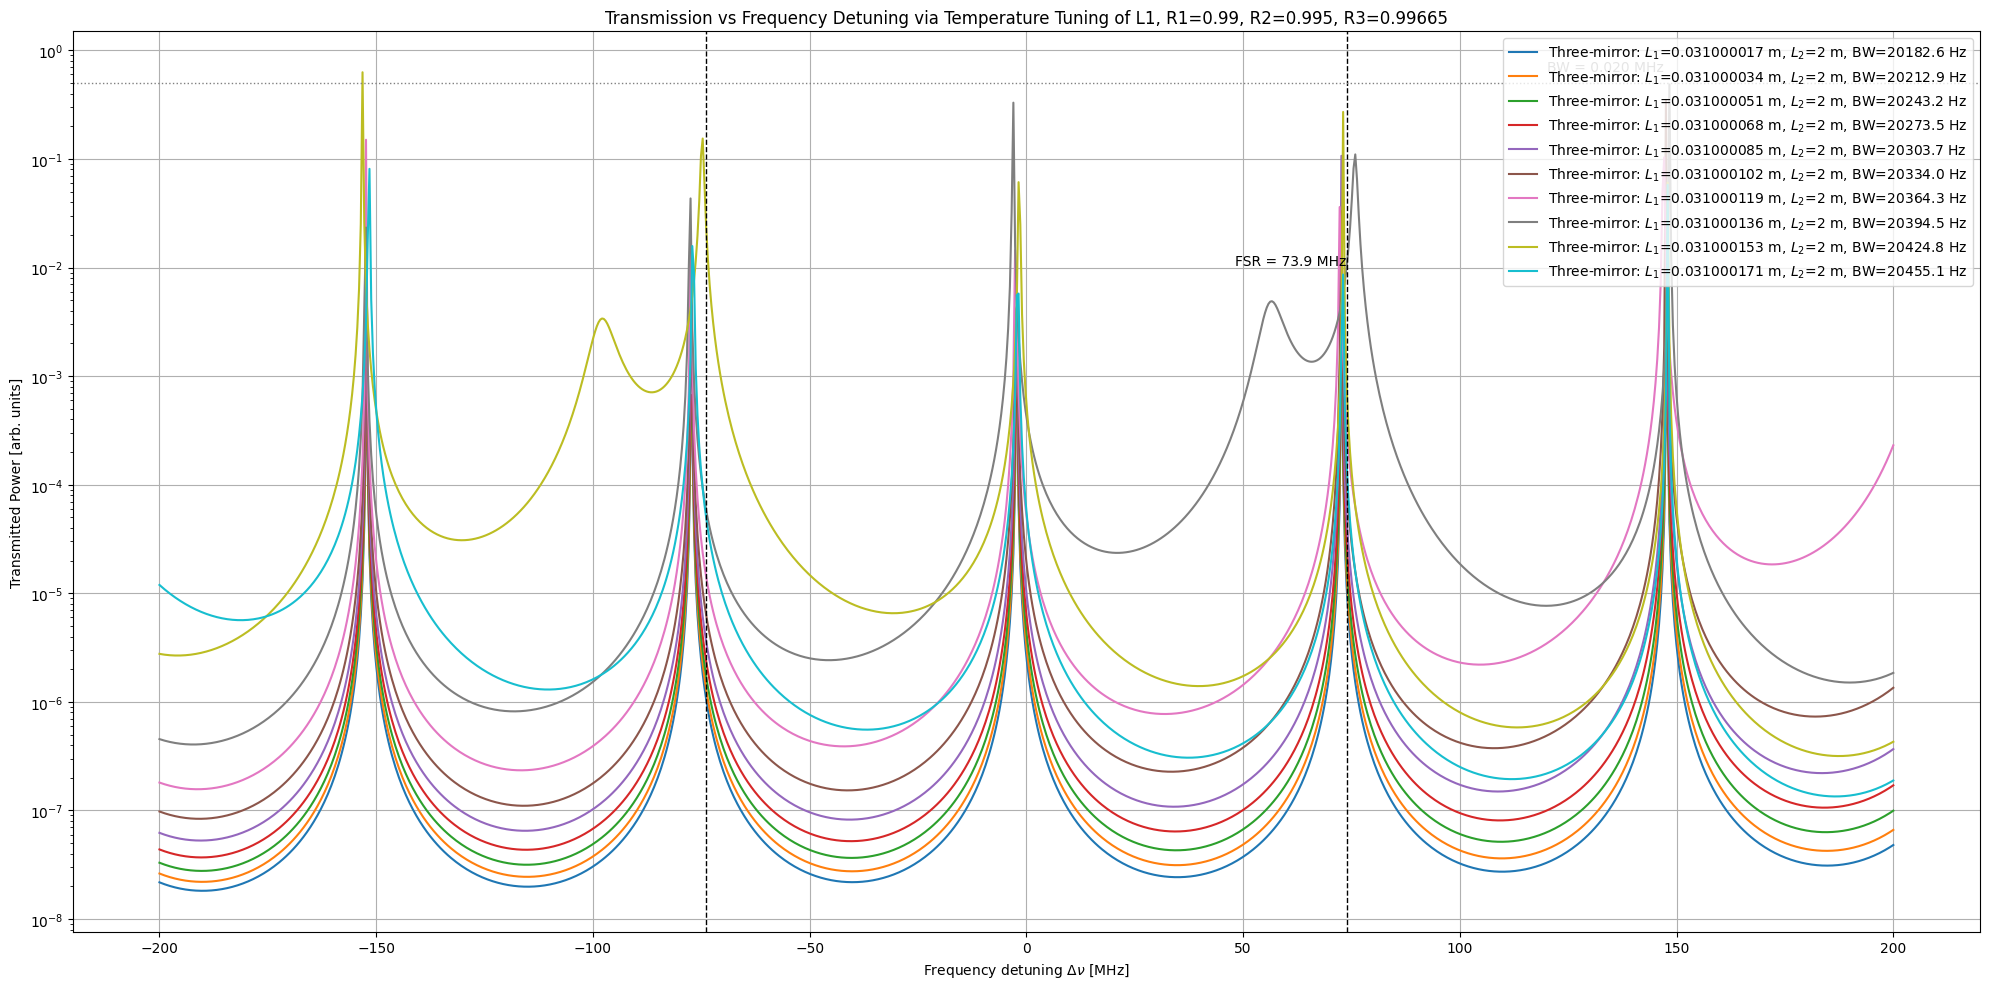

In [17]:
# 1. Set up and compute tunability
L1_best      = 0.031  # 3.1 cm
baseline_bw, bw_expansion, dL1_dT, dgamma_dL1 = BW_tunability(L1_best, L2, R1, R2, R3)
print(f"L1 : {L1_best} m, Baseline Bandwidth: {baseline_bw} Hz, Bandwidth Tunability: {bw_expansion} Hz/°C")

# 2. Plot multiple temperature detunings
plt.figure(figsize=(20, 10))
dL1_arr = [dL1_dT * T for T in np.arange(1, 11)]
for dL1 in dL1_arr:
    T3_test = T_3_mirror(k, L1_best + dL1, L2, R1, R2, R3)
    plt.semilogy(
        dnu * 1e-6,
        T3_test,
        label=(
            f"Three-mirror: $L_1$={L1_best + dL1:.9f} m, "
            f"$L_2$={L2} m, BW={baseline_bw + dgamma_dL1*dL1:.1f} Hz"
        )
    )

# 3. Labels & legend
plt.xlabel("Frequency detuning $\\Delta\\nu$ [MHz]")
plt.ylabel("Transmitted Power [arb. units]")
plt.title(
    f"Transmission vs Frequency Detuning via Temperature Tuning of L1, "
    f"R1={R1}, R2={R2}, R3={R3}"
)
plt.grid(True)
plt.legend(loc='upper right')

# ——————— ADD: FSR and BW annotations ———————
c     = 3e8                      # speed of light (m/s)
Ltot  = L1_best + L2             # total cavity length
FSR   = c / (2 * Ltot)           # free spectral range in Hz
FSR_MHz = FSR * 1e-6
BW_MHz  = baseline_bw * 1e-6

# Vertical lines at ±FSR
plt.axvline(+FSR_MHz, color='k', ls='--', lw=1)
plt.axvline(-FSR_MHz, color='k', ls='--', lw=1)
plt.text(
    FSR_MHz, 1e-2,
    f"FSR = {FSR_MHz:.1f} MHz",
    ha='right', va='bottom', color='k'
)

# Horizontal line at half-max (–3 dB) assuming peak ≈1.0
half_max = 0.5
plt.axhline(half_max, color='gray', ls=':', lw=1)
plt.text(
    dnu.max()*1e-6 * 0.6, half_max * 1.2,
    f"BW = {BW_MHz:.3f} MHz",
    ha='left', va='bottom', color='gray'
)
# ———————————————————————————————

plt.tight_layout()
plt.show()


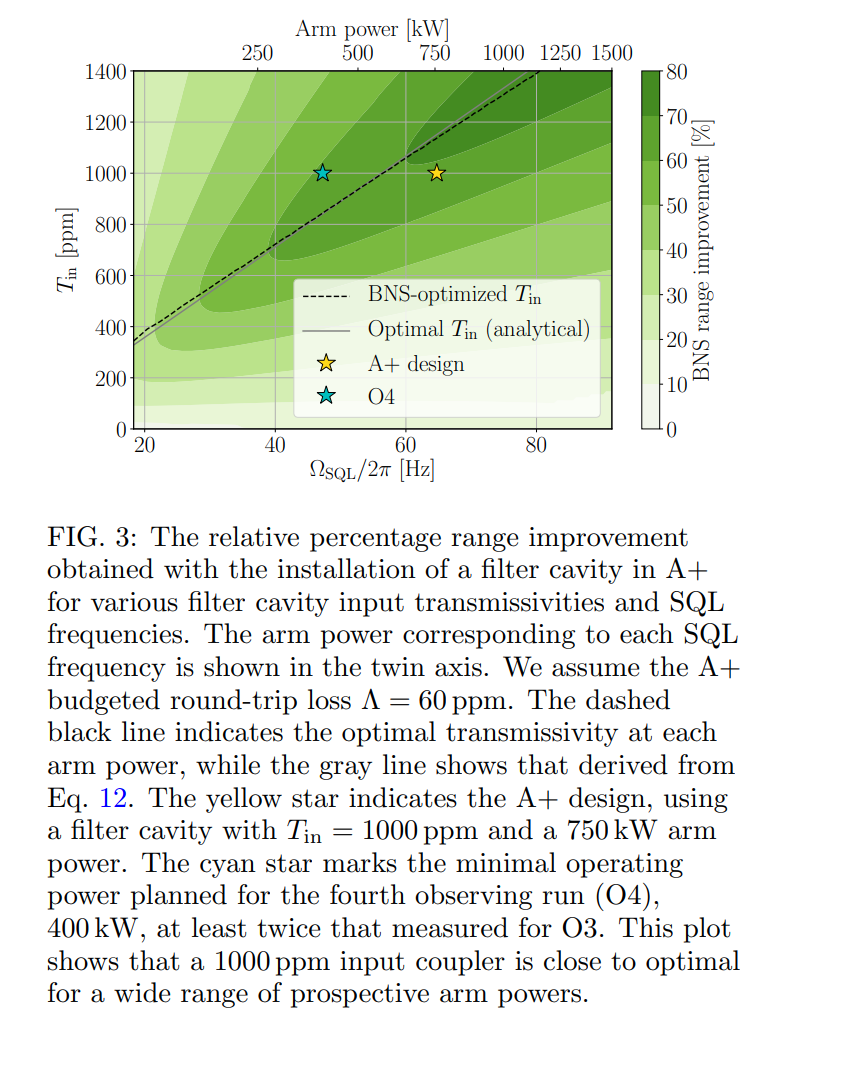